It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/antoniotrapote/intro_deep_learning/blob/main/notebooks/Fundamentals/03_Regression_tuner.ipynb)
[![View on GitHub](https://img.shields.io/badge/View_on-GitHub-black?logo=github)](https://github.com/antoniotrapote/intro_deep_learning/blob/main/notebooks/Fundamentals/03_Regression_tuner.ipynb)

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
tf.keras.utils.set_random_seed(0)

# Abalone Dataset

Abalones are marine snails that can be found along coasts of almost every continent.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/AbaloneInside.jpg/440px-AbaloneInside.jpg" alt="abalone" border="0" width="400" height="500">



In this notebook we are going to Predict the age of abalone from physical measurements. [Link to documentation](https://archive.ics.uci.edu/ml/datasets/abalone).

In [41]:
df_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])
df_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [42]:
df_train.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000
mean,0.522693,0.406575,0.139271,0.824734,0.357705,0.180162,0.237921,9.896988
std,0.121164,0.100120,0.042708,0.491182,0.222223,0.110182,0.140261,3.205654
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.436375,0.181500,0.092000,0.127375,8.000000
50%,0.540000,0.425000,0.140000,0.795250,0.335500,0.170750,0.230000,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.504500,0.253125,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


In [43]:
y_train = df_train.pop('Age')
X_train = df_train.copy()

In [44]:
df_test = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_test.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])
y_test = df_test.pop('Age')
X_test = df_test.copy()

In [45]:
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')

X_train shape: (3320, 7), X_test shape: (850, 7)


### **¿Qué función de activación usar en la capa de salida en un problema de regresión?**

En tareas de **regresión**, como predecir la edad de un abalone, la **función de activación** de la **capa de salida** debe elegirse según el rango de valores que esperas predecir.


✅ Opción recomendada

- **Sin activación (`activation=None`)** Es equivalente a `activation='linear'`
  - ✔ Permite predecir cualquier valor real (positivo o negativo).
  - ✔ Es la opción más común y flexible en regresión.
  - 📌 Ejemplo:
    ```python
    outputs = layers.Dense(1)(x)
    ```


⚠ Opción válida si las salidas deben ser **positivas**

- **ReLU (`activation='relu'`)**
  - ✔ Asegura que la salida sea mayor o igual que 0.
  - ⚠ Puede limitar el aprendizaje si se necesitan valores cercanos a 0 o negativos.
  - 📌 Ejemplo:
    ```python
    outputs = layers.Dense(1, activation='relu')(x)
    ```


❌ Opciones no recomendadas para regresión

- **Sigmoid (`activation='sigmoid'`)**
  - 🔒 Restringe la salida entre 0 y 1 → Demasiado limitado para regresión general.

- **Tanh (`activation='tanh'`)**
  - 🔒 Restringe la salida entre -1 y 1 → Incluso más limitado.


>**Conclusión**:  
>Para tareas de regresión, **la mejor práctica es no usar ninguna función de activación en la capa de salida**, a menos que tengas una razón clara para restringir el rango de los valores predichos.


## Regression Losses

- **Mean Squared Error (MSE)**:

```python
tf.keras.losses.MSE
```
```python
model.compile(loss='mse') or model.compile(loss=tf.keras.losses.MSE)
```

$$ \mathrm{MSE} = \frac{\sum_{i=1}^n\left( y_i - \hat{y_i}\right)^2}{n}$$


- **Mean Absolute Error (MAE)**:

```python
tf.keras.losses.MAE
```
```python
model.compile(loss='mae') or model.compile(loss=tf.keras.losses.MAE)
```

$$ \mathrm{MAE} = \frac{\sum_{i=1}^n\left| y_i - \hat{y_i}\right|}{n}$$


### **¿Qué métricas usar en problemas de regresión?**

En problemas de **regresión**, como predecir una variable continua (por ejemplo, la edad de un abalone), debemos usar **funciones de pérdida** y **métricas** adecuadas al tipo de tarea:



✅ Función de pérdida recomendada

- **`'mse'`** (Error cuadrático medio – *Mean Squared Error*)
  - Calcula el promedio del cuadrado de los errores (diferencia entre valor real y predicho).
  - Penaliza más fuertemente los errores grandes.
  - 📌 Muy común y adecuada para la mayoría de tareas de regresión.



✅ Métricas recomendadas

- **`'mae'`** (Error absoluto medio – *Mean Absolute Error*)
  - Más interpretable: representa el error promedio en las mismas unidades que la variable objetivo.
  - 📌 Ideal para monitorizar el rendimiento del modelo de forma más comprensible.



❌ Métricas NO adecuadas

- **`'accuracy'`**, `'categorical_accuracy'`, `'binary_accuracy'`, etc.
  - ❌ Solo son útiles para clasificación, no tienen sentido en regresión.
  - 🔴 Pueden dar resultados confusos o cercanos a 0 aunque el modelo esté funcionando bien.

---

**¿Qué valores cabe esperar?**

>- **MSE**: valores más bajos indican mejor rendimiento (idealmente cerca de 0).
>- **MAE**: valores bajos (por ejemplo, 1 o 2 unidades de edad) son buenos. Depende de la escala de la variable objetivo.



**Ejemplo de configuración correcta en `.compile()`:**

```python
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']       # útil para interpretar el error
)


## Question 1: Create a net with at least 1 hidden layer


1. You can use the [Functional API](https://keras.io/guides/functional_api/):

You need to start with an input data entry:
```python    
    inputs = keras.Input(shape=(...,))
    layer_1 = layers.Dense(...)(inputs)
```

and the network outputs:
```python
outputs = layers.Dense(...)(previous_layer)
model = keras.Model(inputs=inputs, outputs=outputs)
```

2. Or you can use [Sequential API](https://keras.io/guides/sequential_model/)

```python
model = keras.Sequential(name='example_model')
model.add(layers.Dense(..., input_shape=(8,))
model.add(...
```

You can introduce regularization methods seen in [Prevent_Overfitting.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb) like [Dropout layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout):


```python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

With Functional API:
```python
next_layer = layers.Dropout(0.4)(prev_layer)
```
With Sequential:
```python
model.add(layers.Dropout(0.4))


In [46]:
# Example using Sequential
model = keras.Sequential()

# Input
model.add(keras.Input(shape=(7,), name='input'))

# 1st hidden layer
model.add(layers.Dense(8, activation='relu', name='hl1'))
model.add(layers.Dropout(0.5, name='dropout_l1'))

# 2nd hidden layer
model.add(layers.Dense(8, activation='relu', name='hl2'))
model.add(layers.Dropout(0.5, name='dropout_l2'))

# Output layer
model.add(layers.Dense(1, name='output')) # Sin función de activación

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hl1 (Dense)                     │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l1 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l2 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Using the Functional API
# Input layer
inputs = keras.Input(shape=(7,), name='input')

# Hidden layers, You can also add dropout or other layer types
l_1 = layers.Dense(16, activation='relu', name='hl1')(inputs)
l_1 = layers.Dropout(0.5, name='dropout_l1')(l_1) # Dropout 0.5

l_2 = layers.Dense(16, activation='relu', name='hl2')(l_1)
l_2 = layers.Dropout(0.5, name='dropout_l2')(l_2) # Dropout 0.5

# Define the output layer
outputs = layers.Dense(1, name='output')(l_2)

# Create the model by specifying inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs, name='regresion_model')

# Model summary
model.summary()

Model: "regresion_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl1 (Dense)                     │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l1 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l2 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',     # Puede ser 'val_loss' o 'val_mae'
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
    mode='min'              # Porque queremos minimizar el error
)

In [49]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'],
)

# Fit the model with normalized data
model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=early_stopping,  # early stopping
    verbose=0
    )

In [50]:
# Evaluate
results = model.evaluate(X_test, y_test, verbose=1)
print('Test MSE: {}'.format(results[0]))
print('Test MAE: {}'.format(results[1]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7656 - mae: 1.7111
Test MSE: 6.255663871765137
Test MAE: 1.6467875242233276


## Question 2: Normalize the inputs and train the same model

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
print('X_train mu, sigma', X_train_norm.mean(0), X_train_norm.std(0))
print('X_test mu, sigma', X_test_norm.mean(0), X_test_norm.std(0))

X_train mu, sigma [ 2.77689518e-16  4.65491099e-17  2.50402109e-16 -2.81434849e-16
  2.18299274e-16  1.77100637e-16 -1.05404306e-16] [1. 1. 1. 1. 1. 1. 1.]
X_test mu, sigma [0.05808422 0.06917445 0.03098307 0.04461505 0.04160742 0.02421514
 0.03516632] [0.95187926 0.95135017 0.89294094 0.99223632 0.99454932 0.97495047
 0.96304109]


In [52]:
# Input layer
inputs = keras.Input(shape=(7,), name='input')

# Hidden layers, You can also add dropout or other layer types
l_1 = layers.Dense(16, activation='relu', name='hl1')(inputs)
l_1 = layers.Dropout(0.5, name='dropout_l1')(l_1) # Dropout 0.5

l_2 = layers.Dense(16, activation='relu', name='hl2')(l_1)
l_2 = layers.Dropout(0.5, name='dropout_l2')(l_2) # Dropout 0.5

# Define the output layer
outputs = layers.Dense(1, name='output')(l_2)

# Create the model by specifying inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs, name='regresion_model_norm')

# Model summary
model.summary()

Model: "regresion_model_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl1 (Dense)                     │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l1 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l2 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
    mode='min'
)

In [54]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Fit the model with normalized data
model.fit(
    X_train_norm,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=early_stopping,  # early stopping
    verbose=0
    )

In [55]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test MAE: {}'.format(results[1]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7672 - mae: 1.7063
Test Loss: 6.266520977020264
Test MAE: 1.6543264389038086


### **¿Por qué no mejoran los resultados?**

| Métrica   | Sin Escalar | Escalado |
|-----------|-------------|----------|
| Test MSE  | 6.256       | 6.267    |
| Test MAE  | 1.647       | 1.654    |

Si la escala original de los datos de entrada ya está acotada o equilibrada entre características, el beneficio de normalizar con `StandardScaler()` puede ser mínimo o incluso nulo. De hecho, en algunos casos, podría introducir más ruido que ayuda, especialmente si la red ya estaba funcionando bien con los datos originales.

En el caso de que esto no fuese así, la standarización contribuye a una mejora del rendimiento:

- La red aprende mejor los pesos cuando las entradas tienen escalas similares, porque el descenso del gradiente es más uniforme.

- Sin escalar, las entradas con valores grandes pueden dominar el aprendizaje.

- Además, las activaciones (y gradientes) dentro de la red son más estables con entradas normalizadas.


**Aunque el escalado ayuda:**

- No soluciona por sí solo problemas como arquitectura no óptima, regularización insuficiente, o datos con mucho ruido.

- El margen de mejora depende de qué tan desbalanceadas estaban las escalas originales.

- En tareas simples, la diferencia entre escalar o no puede no ser dramática, pero en redes profundas se vuelve crítico.

## Optimizers:

- [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD): Gradient descent with momentum
```python
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs
)
```
If momentum is 0:
```python
w = w - learning_rate * gradient
```
If we have momentum:

 ```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```


- [RMSprop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop): Root Mean Square Propagation
```python
tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop', **kwargs
)
```
- [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam): Adaptive Moment Estimation,  is an update to the RMSProp algorithm
```python
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)
```

```python
model.compile(loss='mse', optimizer='adam')
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
```

## Question 3: Train the same model with different optimizers

In [59]:
# Input layer
inputs = keras.Input(shape=(7,), name='input')

# Hidden layers, You can also add dropout or other layer types
l_1 = layers.Dense(16, activation='relu', name='hl1')(inputs)
l_1 = layers.Dropout(0.5, name='dropout_l1')(l_1) # Dropout 0.5

l_2 = layers.Dense(16, activation='relu', name='hl2')(l_1)
l_2 = layers.Dropout(0.5, name='dropout_l2')(l_2) # Dropout 0.5

# Define the output layer
outputs = layers.Dense(1, name='output')(l_2)

# Create the model by specifying inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs, name='regresion_model_norm')

# Model summary
model.summary()

Model: "regresion_model_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl1 (Dense)                     │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l1 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l2 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
    mode='min'
)

In [61]:
# Compile the model
model.compile(
    optimizer='RMSProp',
    loss='mse',
    metrics=['mae']
)

# Fit the model with normalized data
model.fit(
    X_train_norm,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=early_stopping,  # early stopping
    verbose=0
    )

In [62]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print(f'Test Loss: {results[0]}')
print(f'Test MAE: {results[1]}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5808 - mae: 1.6905
Test Loss: 6.147087097167969
Test MAE: 1.6332629919052124


# Keras Tuner : Introduction to Hyperparameter Optimization

The [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner) is a library for hyper-parameter tuning.

## What is Hyperparameter Tuning?

Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model to maximize its performance. Unlike model parameters (weights and biases) that are learned during training, hyperparameters are set before the learning process begins and influence how the model learns.

Common hyperparameters include:
- **Model architecture**: number of layers, units per layer
- **Training parameters**: learning rate, batch size, dropout rate
- **Regularization**: L1/L2 penalties, early stopping criteria

Manual tuning of these parameters can be time-consuming and often leads to suboptimal results. Keras Tuner provides an automated approach to efficiently search the hyperparameter space.

## Understanding Different Tuning Strategies

Keras Tuner offers four main strategies for hyperparameter optimization:

### 1. RandomSearch
- **How it works**: Randomly samples from the hyperparameter space
- **Pros**: Simple, easily parallelizable, no assumptions about parameter importance
- **Cons**: Can be inefficient for large search spaces
- **Best for**: Initial exploration or when little is known about the hyperparameter landscape

### 2. Hyperband
- **How it works**: Allocates resources (epochs) dynamically, quickly discarding poor performers
- **Pros**: More efficient than random search, especially for deep networks
- **Cons**: More complex to configure correctly
- **Best for**: When training is computationally expensive and you want to balance exploration vs. exploitation

### 3. BayesianOptimization
- **How it works**: Builds a probability model of the objective function and uses it to select hyperparameters
- **Pros**: More efficient use of resources, learns from previous evaluations
- **Cons**: More complex, computationally intensive for each iteration
- **Best for**: When evaluation is expensive and you have a moderate search space

### 4. Sklearn
- **How it works**: Interface to scikit-learn's hyperparameter search methods
- **Pros**: Familiar API for those coming from scikit-learn
- **Cons**: Limited to sklearn's hyperparameter tuning capabilities
- **Best for**: When integrating with existing sklearn pipelines


In [65]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.7 MB/s eta 0:00:00


In [66]:
import kerastuner as kt

<ipython-input-66-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


Hyperparameters are of two types:
1. **Model hyperparameters** like number of units, type of activation or number hidden layers.
2. **Algorithm hyperparameters** like the learning rate in adam.

The model-building function takes an argument `hp` from which you can sample hyper-parameters.

```python
def build_model(hp):
    ...
    return model

```

- `hp.Int` to sample an integer from a certain range:
```python
hp.Int('units', min_value=32, max_value=256, step=32, default=64)
```
- `hp.Float` to sample a float number from a certain range:
```python
hp.Float('dropout', min_value=0.0, max_value=0.1, default=0.005, step=0.05)
```
- `hp.Choice` to select values in a list:
```python
hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
```
- [list of hyperparameter methods](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/)

In [70]:
def build_model(hp):
    model = keras.Sequential()
    # Sample different number of layers with hp.Int
    for i in range(hp.Int('num_layers', 1, 3)):
        # Sample different number of neurons with hp.Int
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=64,
                                            max_value=128,
                                            step=32),
                               activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Sample different learning rates with hp.Choice
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae'])
    return model

The Keras Tuner has four [tuners](https://keras-team.github.io/keras-tuner/documentation/tuners/) available  `RandomSearch`, `Hyperband`, `BayesianOptimization`, and `Sklearn`


In [72]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=15,
                     factor=3,
                     hyperband_iterations=1,
                     directory='my_dir',
                     project_name='intro_to_kt',
                     overwrite=True)
'''
tuner = kt.RandomSearch(build_model,
                     objective='val_loss',
                     max_trials=100,
                     directory='my_dir',
                     project_name='intro_to_kt')
'''

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [73]:
tuner.search(X_train_norm, y_train, epochs=30, validation_split=0.15, batch_size=32, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.get_config())

Trial 30 Complete [00h 00m 11s]
val_loss: 4.6630377769470215

Best val_loss So Far: 4.6484551429748535
Total elapsed time: 00h 02m 56s
{'space': [{'class_name': 'Int', 'config': {'name': 'num_layers', 'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_0', 'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}}, {'class_name': 'Int', 'config': {'name': 'units_1', 'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_2', 'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}], 'values': {'num_layers': 3, 'units_0': 64, 'learning_rate': 0.01, 'units_1

In [74]:
tuner.results_summary()

Results summary
Results in my_dir/intro_to_kt
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
num_layers: 3
units_0: 64
learning_rate: 0.01
units_1: 128
units_2: 64
tuner/epochs: 15
tuner/initial_epoch: 5
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 4.6484551429748535

Trial 0029 summary
Hyperparameters:
num_layers: 2
units_0: 96
learning_rate: 0.001
units_1: 128
units_2: 96
tuner/epochs: 15
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 4.6630377769470215

Trial 0027 summary
Hyperparameters:
num_layers: 3
units_0: 128
learning_rate: 0.01
units_1: 96
units_2: 96
tuner/epochs: 15
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 4.666423320770264

Trial 0025 summary
Hyperparameters:
num_layers: 3
units_0: 64
learning_rate: 0.01
units_1: 64
units_2: 96
tuner/epochs: 15
tuner/initial_epoch: 5
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0021
Score: 4.675746440887451

Trial 0016 summary
Hyp

In [75]:
print(f"Best number of hidden layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Number of units in hidden layer {i+1}: {best_hps.get('units_' + str(i))}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


Best number of hidden layers: 3
Number of units in hidden layer 1: 64
Number of units in hidden layer 2: 128
Number of units in hidden layer 3: 64
Best learning rate: 0.01


### Hyperparameter Importance

Extracting hyperparameter data from tuner...
Analyzed 30 trials

Top 10 configurations:

Rank 1 (Score: 4.6485):
  learning_rate: 0.01
  num_layers: 3
  tuner/bracket: 1
  tuner/epochs: 15
  tuner/initial_epoch: 5
  tuner/round: 1
  tuner/trial_id: 0023
  units_0: 64
  units_1: 128.0
  units_2: 64.0

Rank 2 (Score: 4.6630):
  learning_rate: 0.001
  num_layers: 2
  tuner/bracket: 0
  tuner/epochs: 15
  tuner/initial_epoch: 0
  tuner/round: 0
  tuner/trial_id: nan
  units_0: 96
  units_1: 128.0
  units_2: 96.0

Rank 3 (Score: 4.6664):
  learning_rate: 0.01
  num_layers: 3
  tuner/bracket: 0
  tuner/epochs: 15
  tuner/initial_epoch: 0
  tuner/round: 0
  tuner/trial_id: nan
  units_0: 128
  units_1: 96.0
  units_2: 96.0

Rank 4 (Score: 4.6757):
  learning_rate: 0.01
  num_layers: 3
  tuner/bracket: 1
  tuner/epochs: 15
  tuner/initial_epoch: 5
  tuner/round: 1
  tuner/trial_id: 0021
  units_0: 64
  units_1: 64.0
  units_2: 96.0

Rank 5 (Score: 4.7696):
  learning_rate: 0.01
  num_layers: 2

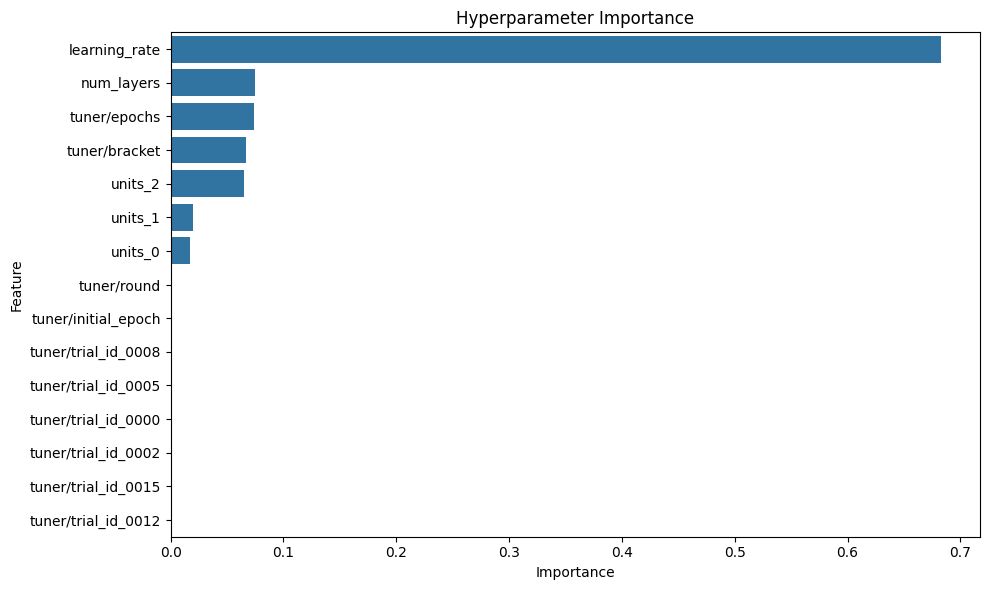


Hyperparameter importance ranking:
1. learning_rate: 0.6832
2. num_layers: 0.0745
3. tuner/epochs: 0.0736
4. tuner/bracket: 0.0664
5. units_2: 0.0652
6. units_1: 0.0197
7. units_0: 0.0173
8. tuner/round: 0.0000
9. tuner/initial_epoch: 0.0000
10. tuner/trial_id_0008: 0.0000
11. tuner/trial_id_0005: 0.0000
12. tuner/trial_id_0000: 0.0000
13. tuner/trial_id_0002: 0.0000
14. tuner/trial_id_0015: 0.0000
15. tuner/trial_id_0012: 0.0000


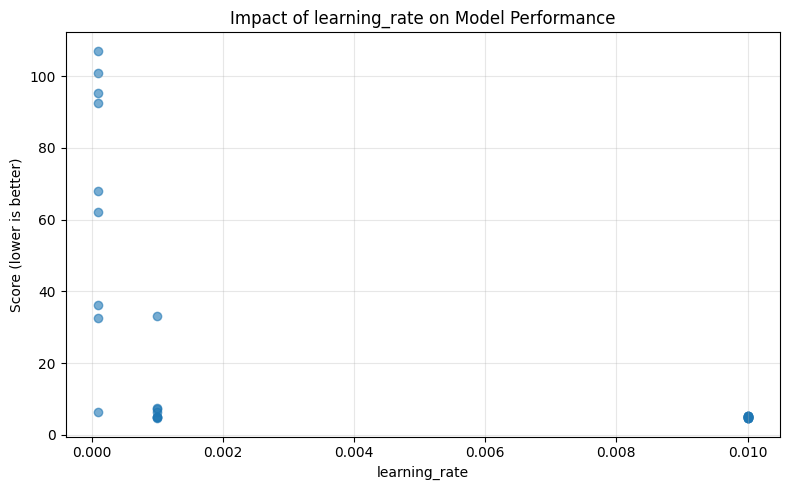


Analysis complete. Use these insights to refine your hyperparameter search!


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

def analyze_hyperparameter_importance(tuner, top_n=10):
    """
    Analyze the importance of different hyperparameters using Random Forest.

    Parameters:
    -----------
    tuner : keras_tuner.Tuner
        The tuner object after running a hyperparameter search
    top_n : int, default=10
        Number of top trials to print

    Returns:
    --------
    importance_df : pandas.DataFrame
        DataFrame containing the importance of each hyperparameter
    """
    print("Extracting hyperparameter data from tuner...")

    # Extract hyperparameters and scores from tuner
    hp_results = []

    for trial_id, trial in tuner.oracle.trials.items():
        if trial.score is not None:  # Only include completed trials
            # Get hyperparameters
            hp_values = trial.hyperparameters.values
            # Add score (lower is better for loss)
            hp_values['score'] = trial.score
            hp_results.append(hp_values)

    # Convert to DataFrame
    results_df = pd.DataFrame(hp_results)

    # Show basic stats
    print(f"Analyzed {len(results_df)} trials")
    print("\nTop {top_n} configurations:".format(top_n=top_n))
    top_configs = results_df.sort_values('score').head(top_n)
    for i, (_, config) in enumerate(top_configs.iterrows()):
        print(f"\nRank {i+1} (Score: {config['score']:.4f}):")
        for param, value in sorted(config.items()):
            if param != 'score':
                print(f"  {param}: {value}")

    # Prepare data for Random Forest
    X = results_df.drop('score', axis=1)

    # Convert non-numeric columns to numeric
    for col in X.columns:
        if X[col].dtype == 'object':
            # Create dummies for categorical variables
            dummies = pd.get_dummies(X[col], prefix=col)
            X = pd.concat([X.drop(col, axis=1), dummies], axis=1)

    y = results_df['score']

    # Train Random Forest for feature importance
    print("\nTraining Random Forest to analyze hyperparameter importance...")
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Get feature importance
    importance = rf.feature_importances_

    # Create DataFrame of features and importance
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
    plt.title('Hyperparameter Importance')
    plt.tight_layout()
    plt.show()

    # Print importance values
    print("\nHyperparameter importance ranking:")
    for i, (_, row) in enumerate(importance_df.iterrows()):
        if i < 15:  # Print top 15
            print(f"{i+1}. {row['Feature']}: {row['Importance']:.4f}")

    # Analyze top feature's impact with partial dependence plot
    top_feature = importance_df.iloc[0]['Feature']
    if top_feature in X.columns:  # Ensure it's a numeric feature
        plt.figure(figsize=(8, 5))
        plt.scatter(X[top_feature], y, alpha=0.6)
        plt.title(f'Impact of {top_feature} on Model Performance')
        plt.xlabel(top_feature)
        plt.ylabel('Score (lower is better)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    print("\nAnalysis complete. Use these insights to refine your hyperparameter search!")

    return importance_df



# After running tuner.search():
# 1. Get overall importance
importance_df = analyze_hyperparameter_importance(tuner)


## Train the model

In [77]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_norm, y_train, epochs=50, validation_split=0.15, callbacks=[stop_early])

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 27.2828 - mae: 3.6775 - val_loss: 7.3992 - val_mae: 2.1218
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5977 - mae: 1.7368 - val_loss: 5.8455 - val_mae: 1.9336
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9990 - mae: 1.6715 - val_loss: 6.1725 - val_mae: 2.0241
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7954 - mae: 1.6351 - val_loss: 5.4323 - val_mae: 1.8354
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6591 - mae: 1.6140 - val_loss: 5.1080 - val_mae: 1.7379
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5224 - mae: 1.5850 - val_loss: 4.9157 - val_mae: 1.6837
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4056 - mae: 1.5588 - val_loss: 4.8734 - val_mae: 1.6639
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3402 - mae: 1.5474 - val_loss: 4.7851 - val_mae: 1.6321
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2753 - mae

In [78]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print(f'Test Loss: {results[0]}')
print(f'Test MAE: {results[1]}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7543 - mae: 1.6075
Test Loss: 5.194920539855957
Test MAE: 1.538832426071167


## Question 4: Try to search with dropout

In [79]:
def build_model(hp):
    """Build a model with tunable architecture and dropout regularization."""
    model = keras.Sequential()

    # Tune the number of layers (try 1-4 layers)
    for i in range(hp.Int('num_layers', min_value=1, max_value=4)):
        # Tune the number of units in each layer
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=128, step=32),
            activation=hp.Choice(f'activation_{i}', values=['sigmoid','relu'])
        ))

        # Add dropout after each dense layer
        # Hint: Experiment with different dropout ranges
        model.add(layers.Dropout(
            rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.7, step=0.1)
        ))

    # Output layer for regression)
    model.add(layers.Dense(1, activation='linear'))

    # Tune the optimizer and learning rate
    # Hint: Try different optimizers and log-scale for learning rate
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae']
    )

    return model

In [80]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=15,
                     factor=3,
                     hyperband_iterations=1,
                     directory='my_dir_2',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    )

tuner.search(X_train_norm, y_train, epochs=20, validation_split=0.15,
             batch_size=32, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.get_config())

Trial 30 Complete [00h 00m 14s]
val_loss: 5.098869323730469

Best val_loss So Far: 4.736850738525391
Total elapsed time: 00h 04m 41s
{'space': [{'class_name': 'Int', 'config': {'name': 'num_layers', 'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_0', 'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'activation_0', 'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}}, {'class_name': 'Float', 'config': {'name': 'dropout_0', 'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.7, 'step': 0.1, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'optimizer', 'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}}, {'class_name': 'Float', 'config': {'name': 'learning_rate', 'default': 0.0001, 'co

In [81]:
print(f"Best optimizer: {best_hps.get('optimizer')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best number of hidden layers: {best_hps.get('num_layers')}")

for i in range(best_hps.get('num_layers')):
    print(f"  → Hidden layer {i+1}:")
    print(f"     - Units: {best_hps.get(f'units_{i}')}")
    print(f"     - Activation: {best_hps.get(f'activation_{i}')}")
    print(f"     - Dropout rate: {best_hps.get(f'dropout_{i}')}")

Best optimizer: adam
Best learning rate: 0.00330588674286921
Best number of hidden layers: 4
  → Hidden layer 1:
     - Units: 96
     - Activation: relu
     - Dropout rate: 0.2
  → Hidden layer 2:
     - Units: 96
     - Activation: relu
     - Dropout rate: 0.6
  → Hidden layer 3:
     - Units: 96
     - Activation: sigmoid
     - Dropout rate: 0.1
  → Hidden layer 4:
     - Units: 128
     - Activation: relu
     - Dropout rate: 0.1


In [82]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_norm, y_train, epochs=50, validation_split=0.15, callbacks=[stop_early])

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 25.7658 - mae: 3.6415 - val_loss: 5.5455 - val_mae: 1.6777
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8699 - mae: 1.8063 - val_loss: 4.9938 - val_mae: 1.5657
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4526 - mae: 1.7443 - val_loss: 5.6571 - val_mae: 1.6489
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1635 - mae: 1.6734 - val_loss: 4.8456 - val_mae: 1.5345
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8831 - mae: 1.6254 - val_loss: 5.0818 - val_mae: 1.5703
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2901 - mae: 1.7099 - val_loss: 5.3985 - val_mae: 1.5886
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1367 - mae: 1.6874 - val_loss: 4.9412 - val_mae: 1.5536
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0176 - mae: 1.6237 - val_loss: 5.1784 - val_mae: 1.5644
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0798 - mae

In [83]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print(f'Test Loss: {results[0]}')
print(f'Test MAE {results[1]}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0974 - mae: 1.6446
Test Loss: 5.742363452911377
Test MAE 1.6147629022598267
